In [1]:
"""
Typically, data to be analyzed in real world applications is not fully clean. Frequently, there are missing fields, invalid values, etc.


A civil engineer is working in the design of a bridge, trying to find different alternatives, each of them having a total bridge weight 
and the degree of deformation in certain parts (e.g., see http://ebesjmetal.sourceforge.net/problems.html). After using an optimization software,
she/he has obtained a .txt file (attached to this task) with a number of rows indicating different trade-off designs. 


Unfortunately, some lines/fields have invalid values (blank lines, missing values, characters instead of numbers, etc), and there are also repeteated lines.

This task consists in developing a Jupyter notebook with PySpark to read the file, remove all the invalid lines and remove those that are appears more than one time, and plot the clean data.

The deliverable will be the Jupyter notebook.
"""

'\nTypically, data to be analyzed in real world applications is not fully clean. Frequently, there are missing fields, invalid values, etc.\n\n\nA civil engineer is working in the design of a bridge, trying to find different alternatives, each of them having a total bridge weight \nand the degree of deformation in certain parts (e.g., see http://ebesjmetal.sourceforge.net/problems.html). After using an optimization software,\nshe/he has obtained a .txt file (attached to this task) with a number of rows indicating different trade-off designs. \n\n\nUnfortunately, some lines/fields have invalid values (blank lines, missing values, characters instead of numbers, etc), and there are also repeteated lines.\n\nThis task consists in developing a Jupyter notebook with PySpark to read the file, remove all the invalid lines and remove those that are appears more than one time, and plot the clean data.\n\nThe deliverable will be the Jupyter notebook.\n'

In [2]:
#imports
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession


In [3]:
# Crear SparkSession
spark_session = SparkSession.builder \
    .appName("cleanData") \
    .getOrCreate()

# Obtener SparkContext desde SparkSession
spark_context = spark_session.sparkContext
spark_context.setLogLevel("ERROR")


In [4]:
#Lectura

path_file = "./data/bridge.csv"
rdd = spark_context.textFile(path_file)


In [5]:
# Función para verificar si un valor puede convertirse en float
def is_float(value):
    try:
        float(value)  # Intenta convertir a float
        return True
    except ValueError:
        return False


In [6]:
""" 
Pasos:
    1. Se eliminan las cabeceras
    2. Separamos cada fila por cada valor en columnas (usamos la ',' como separación)
    3. Evitamos las filas con longitud distinta de 2 y con un valor no númerico 
        (tanto strings como valores vacíos) usando la función definida is_float
    4. Convertimos los valores a númericos (por si acaso, útil para la visualización luego)
        Además convertimos cada fila en una tupla (inmutable) nos servirá para luego obtener las filas únicas.
    5. Asegurars de que todos las filas  sean únicas
"""

" \nPasos:\n    1. Se eliminan las cabeceras\n    2. Separamos cada fila por cada valor en columnas (usamos la ',' como separación)\n    3. Evitamos las filas con longitud distinta de 2 y con un valor no númerico \n        (tanto strings como valores vacíos) usando la función definida is_float\n    4. Convertimos los valores a númericos (por si acaso, útil para la visualización luego)\n        Además convertimos cada fila en una tupla (inmutable) nos servirá para luego obtener las filas únicas.\n    5. Asegurars de que todos las filas  sean únicas\n"

In [7]:
# Obtener la cabecera
header = rdd.first()

rdd = rdd.filter(lambda line: line != header) \
    .map(lambda line: line.split(",")) \
    .filter(lambda line: len(line) == 2 and all(is_float(x.strip()) for x in line)) \
    .map(lambda line: tuple(float(x.strip()) for x in line))\
    .distinct()

data = rdd.collect()

In [ ]:
#Gráfico:

In [8]:
import matplotlib.pyplot as plt

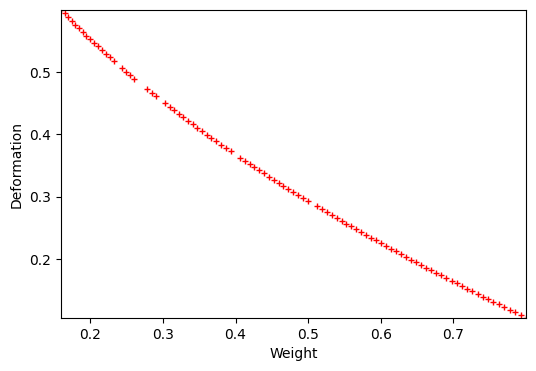

In [10]:

# Separar valores en listas de X (Weight) y Y (Deformation)
x_values = [row[0] for row in data]
y_values = [row[1] for row in data]

# Crear el gráfico
plt.figure(figsize=(6, 4))
plt.plot(x_values, y_values, 'r+', markersize=5)  # Puntos rojos con cruces ('+')

# Configurar etiquetas y límites
plt.xlim(min(x_values), max(x_values))
plt.ylim(min(y_values), max(y_values))
plt.xlabel("Weight")
plt.ylabel("Deformation")



# Mostrar el gráfico
plt.show()
